In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
sheep_ml_path = "/Users/matthewvicario/Desktop/Project3/Output/sheep_ml.csv"
sheep_ml_data = pd.read_csv(sheep_ml_path)
sheep_ml_data

,Unnamed: 0,Year,Sheep Load,Sheep Loss,Sheep Pct
0,0,13,225985.0,1169.0,0.517291
1,1,14,2159664.0,15563.0,0.720621
2,2,15,2015279.0,12910.0,0.640606
3,3,16,1705575.0,13667.0,0.801313
4,4,17,1845272.0,13183.0,0.714420
5,5,18,1143498.0,5387.0,0.471098
6,6,19,969513.0,2472.0,0.254973


In [7]:
sheep_ml_data = sheep_ml_data[["Year","Sheep Pct"]]
sheep_ml_data = sheep_ml_data.rename(columns={"Sheep Pct": "Sheep_Pct"})
sheep_ml_data

,Year,Sheep_Pct
0,13,0.517291
1,14,0.720621
2,15,0.640606
3,16,0.801313
4,17,0.714420
5,18,0.471098
6,19,0.254973


In [8]:
sheep_ml_data["Sheep_Pct"]=sheep_ml_data["Sheep_Pct"].round(4)
sheep_ml_data

,Year,Sheep_Pct
0,13,0.5173
1,14,0.7206
2,15,0.6406
3,16,0.8013
4,17,0.7144
5,18,0.4711
6,19,0.2550


In [10]:
X = sheep_ml_data.Year.values.reshape(-1, 1)
y = sheep_ml_data.Sheep_Pct

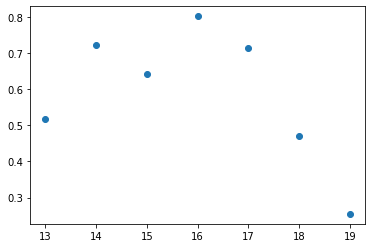

In [11]:
plt.scatter(X, y)

In [12]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model

LinearRegression()

In [13]:
model.fit(X, y)
print(model)

LinearRegression()


In [14]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [-0.04328929]
y-axis intercept:  1.281242857142857


In [15]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.5173
Predicted output: 0.7184821428571428
Prediction Error: 0.20118214285714286


In [16]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,0.718482,0.5173,0.201182
1,0.675193,0.7206,-0.045407
2,0.631904,0.6406,-0.008696
3,0.588614,0.8013,-0.212686
4,0.545325,0.7144,-0.169075
5,0.502036,0.4711,0.030936
6,0.458746,0.2550,0.203746


In [17]:
x_min = X.min()
x_max = X.max()

In [18]:
y_min_actual = y.min()
y_max_actual = y.max()

In [19]:
y_min = 0.12870285714285723 + 0.01900286* x_min
y_max = 0.12870285714285723 + 0.01900286 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.255
Calculated Min Value: 0.3757400371428572
Actual Max Value: 0.8013
Calculated Max Value: 0.4897571971428572


In [20]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 0.255
Predicted Min Value: [0.71848214]
Actual Max Value: 0.8013
Predicted Max Value: [0.45874643]


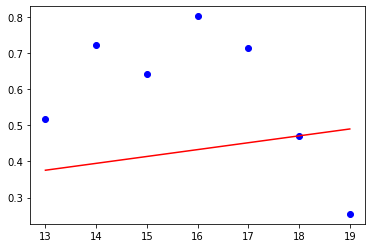

In [21]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')